In [19]:
import zipfile
import json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
import ast

# Review Json

In [20]:
yelp_review_df = pd.read_json('/content/drive/MyDrive/reviews/review.json', lines=True, nrows=100000)
yelp_business_df = pd.read_pickle('/content/business.pkl')

In [21]:
yelp_review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
99995,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56
99996,xH1AoE-4nf2ECGQJRjO4_g,2clTdtp-BjphxLjN83CpUA,G0xz3kyRhRi6oZl7KfR0pA,1,1,0,0,The equipment is so old and so felty! I just u...,2015-04-05 23:31:52
99997,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15
99998,6NfkodAdhvI89xONXuBC3A,rnNQzeKJbvqVCsYsL10mkQ,dChRGpit9fM_kZK5pafNyA,2,0,0,0,Came here for brunch - had an omlette ($19 + t...,2018-06-11 12:45:08


# Business PLK

In [22]:
yelp_business_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
yelp_business_df = yelp_business_df.loc[:,~yelp_business_df.columns.duplicated()]

# Verificar nuevamente las columnas del DataFrame para asegurarse de que no haya duplicados
print(yelp_business_df.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


In [30]:
df_merged = pd.merge(yelp_business_df, yelp_review_df, on='business_id', how='inner')

In [69]:
df_merged

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,9vwYDBVI3ymdqcyJ5WW2Tg,e0imecnX_9MtLnS2rUZM-A,5,3,2,1,I've had acupuncture treatments with Abby over...,2012-05-02 18:07:38
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",-WXMS4p3D9NQsAPw4YPEyw,Jks_uMtTZHqP-84wSZ3COg,5,0,0,0,I have a po box there and ea. visit I am greet...,2014-09-15 14:37:42
2,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",z7TqAKXXArEB6LH6Nfr9BQ,trf3Qcz8qvCDKXiTgjUcEg,3,1,0,1,"Bottom Line: \nClean store, Quick Service, Go...",2011-08-01 03:45:56
3,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",8Di0vZGcRLVNCZ-AWKgshA,auE6cx-AMcv2fv4SW_gnzA,5,0,0,0,I went in to ship a package to my friend for h...,2018-03-06 03:17:02
4,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",IOmiYoBPtQsY_fh5uA4mXg,P-NTOAMFVSDFGkhcj4GaIQ,4,1,0,0,We are fans of Target. They seem to have a li...,2017-02-19 15:11:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,TCROPjxfzCZzrQjqLqstSg,Red Cup Cafe & Hookah Lounge,400 Fairmount Ave,Philadelphia,MO,19123,39.962577,-75.144748,4.0,53,...,"Coffee & Tea, Hookah Bars, Nightlife, Bars, Fo...","{'Thursday': '19:0-2:0', 'Friday': '19:0-2:0',...",TvV5fEdo4n1oMHQHcMfdMA,Ob5S_YT0mszh5CkWbzGRBA,5,2,2,2,"Rick, the owner, makes crepes! And good ones ...",2011-07-07 14:37:04
99996,TCROPjxfzCZzrQjqLqstSg,Red Cup Cafe & Hookah Lounge,400 Fairmount Ave,Philadelphia,MO,19123,39.962577,-75.144748,4.0,53,...,"Coffee & Tea, Hookah Bars, Nightlife, Bars, Fo...","{'Thursday': '19:0-2:0', 'Friday': '19:0-2:0',...",lMd8_OJhWE7cILdhDF5fsQ,cUibTaeqGhMuVu_jSqDF7g,3,0,0,0,"Ok, I accidentally discovered this place on my...",2013-12-16 16:29:09
99997,TCROPjxfzCZzrQjqLqstSg,Red Cup Cafe & Hookah Lounge,400 Fairmount Ave,Philadelphia,MO,19123,39.962577,-75.144748,4.0,53,...,"Coffee & Tea, Hookah Bars, Nightlife, Bars, Fo...","{'Thursday': '19:0-2:0', 'Friday': '19:0-2:0',...",G25PFwZbMcoamV90X8QSNw,60Jbp69Xj2lWcoTIVvacNA,5,2,0,0,"Red Cup Cafe is fantastic. Sweet or savory, c...",2011-11-02 19:34:40
99998,TCROPjxfzCZzrQjqLqstSg,Red Cup Cafe & Hookah Lounge,400 Fairmount Ave,Philadelphia,MO,19123,39.962577,-75.144748,4.0,53,...,"Coffee & Tea, Hookah Bars, Nightlife, Bars, Fo...","{'Thursday': '19:0-2:0', 'Friday': '19:0-2:0',...",jiuXD6Q4nQxWar-Ww00atA,6MQCjdqhG8AAg3zhUv0whQ,5,2,0,1,Today my roommate and I stopped by Red Cup Caf...,2012-12-07 00:24:03


In [46]:
print(df.info())

NameError: name 'df' is not defined

In [44]:
print(df_merged.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id', 'stars_y',
       'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')


In [45]:
conteo = yelp_business_df['name'].value_counts()

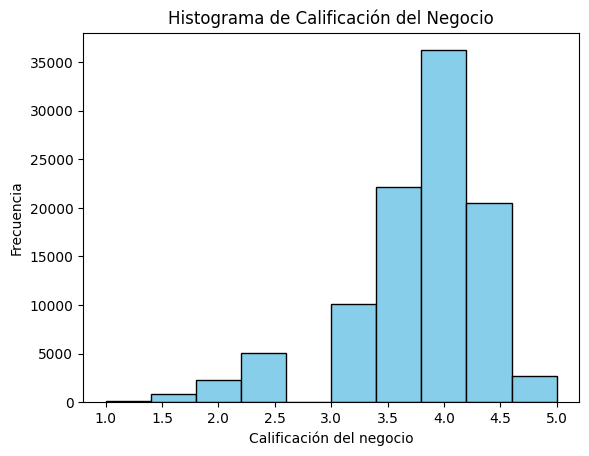

In [35]:
plt.hist(df_merged['stars_x'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Calificación del negocio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calificación del Negocio')
plt.show()

In [ ]:
df_merged

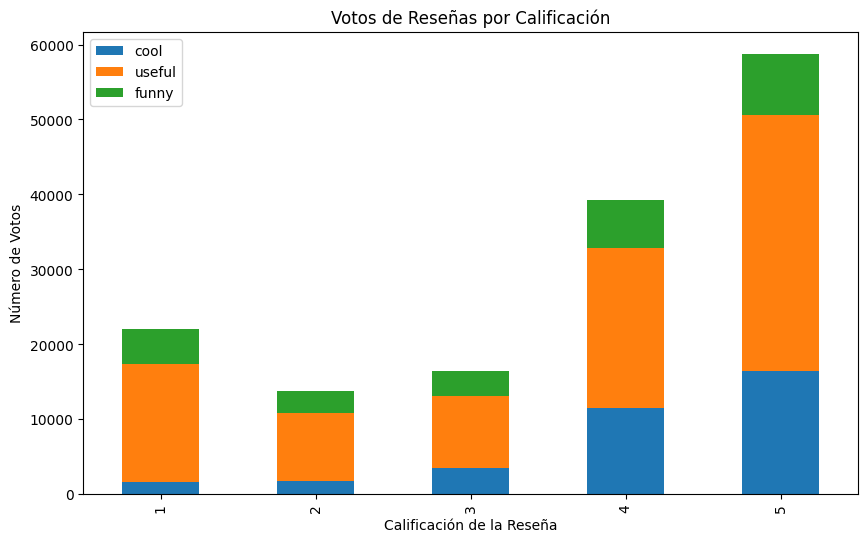

In [43]:
review_votes = df_merged[['stars_y', 'cool', 'useful', 'funny']].groupby('stars_y').sum()
review_votes.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Calificación de la Reseña')
plt.ylabel('Número de Votos')
plt.title('Votos de Reseñas por Calificación')
plt.show()

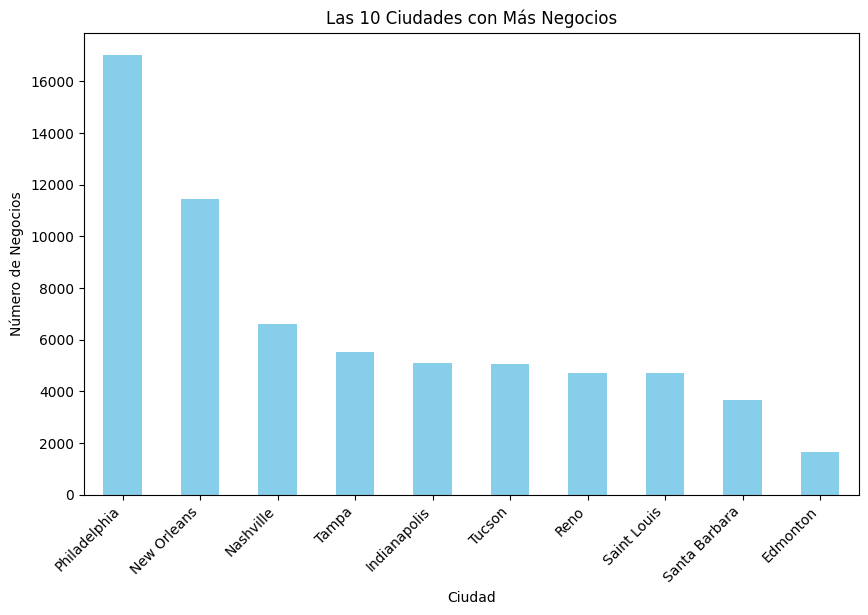

In [39]:
# Obtener las 10 ciudades con más negocios
top_cities = df_merged['city'].value_counts().nlargest(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.xlabel('Ciudad')
plt.ylabel('Número de Negocios')
plt.title('Las 10 Ciudades con Más Negocios')
plt.xticks(rotation=45, ha='right')
plt.show()


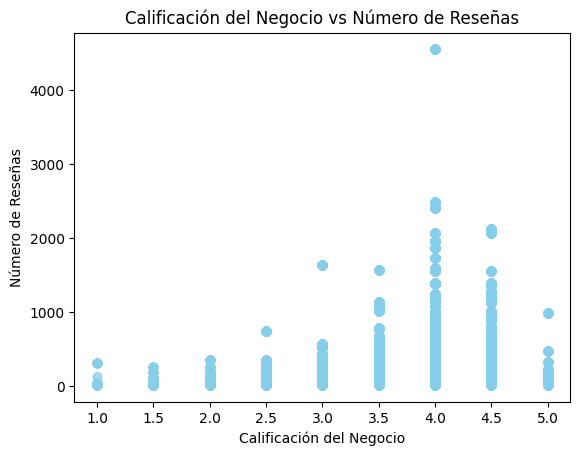

In [41]:
plt.scatter(df_merged['stars_x'], df_merged['review_count'], color='skyblue', alpha=0.5)
plt.xlabel('Calificación del Negocio')
plt.ylabel('Número de Reseñas')
plt.title('Calificación del Negocio vs Número de Reseñas')
plt.show()

# 1.- Tipo de Datos

In [63]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   business_id   100000 non-null  object        
 1   name          100000 non-null  object        
 2   address       100000 non-null  object        
 3   city          100000 non-null  object        
 4   state         99994 non-null   object        
 5   postal_code   100000 non-null  object        
 6   latitude      100000 non-null  object        
 7   longitude     100000 non-null  object        
 8   stars_x       100000 non-null  object        
 9   review_count  100000 non-null  object        
 10  is_open       100000 non-null  object        
 11  attributes    98369 non-null   object        
 12  categories    99996 non-null   object        
 13  hours         94176 non-null   object        
 14  review_id     100000 non-null  object        
 15  user_id       1000

In [52]:
yelp_business_df['business_id'].value_counts()

Pns2l4eNsfO8kk83dixA6A    1
twx6DPOgaD9CN8wlt4Jcbg    1
ogyKKg_D4ioc6Ech_pKqfw    1
9D0aKRGsutg8S0ClIanmrA    1
_XV_ug_IUiJrGfMiJUqz-Q    1
                         ..
WVYcB73fVpBMznlhhqjL4w    1
f9C3eDtfbQrFklCCLDFuaQ    1
WTkDTPmeR_LZn56-xDinZw    1
1uAgni70WHOW2CVOfRMurw    1
jV_XOycEzSlTx-65W906pg    1
Name: business_id, Length: 150346, dtype: int64

In [54]:
yelp_business_df['city'].value_counts()

Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: city, Length: 1416, dtype: int64

In [ ]:
print(df.info())

In [56]:
print(df.isnull().sum())

NameError: name 'df' is not defined

In [59]:
df_merged_nulios = df_merged.isnull().sum()
df_merged_nulios

business_id        0
name               0
address            0
city               0
state              6
postal_code        0
latitude           0
longitude          0
stars_x            0
review_count       0
is_open            0
attributes      1631
categories         4
hours           5824
review_id          0
user_id            0
stars_y            0
useful             0
funny              0
cool               0
text               0
date               0
dtype: int64

In [62]:
df_merged.duplicated().sum()

TypeError: unhashable type: 'dict'

In [67]:
duplicados_por_columna = {}

# Iterar sobre cada columna del DataFrame
for columna in df_merged.columns:
    # Contar los valores duplicados en la columna actual
    duplicados_por_columna[columna] = df_merged.duplicated(subset=[columna]).sum()

# Mostrar el recuento de duplicados por columna
for columna, count in duplicados_por_columna.items():
    print(f"Columna '{columna}': {count} duplicados")

Columna 'business_id': 90027 duplicados
Columna 'name': 91392 duplicados
Columna 'address': 90467 duplicados
Columna 'city': 99449 duplicados
Columna 'state': 99982 duplicados
Columna 'postal_code': 98889 duplicados
Columna 'latitude': 90158 duplicados
Columna 'longitude': 90189 duplicados
Columna 'stars_x': 99991 duplicados
Columna 'review_count': 99466 duplicados
Columna 'is_open': 99998 duplicados
Columna 'attributes': 93611 duplicados
Columna 'categories': 92788 duplicados
Columna 'hours': 94660 duplicados
Columna 'review_id': 0 duplicados
Columna 'user_id': 20655 duplicados
Columna 'stars_y': 99995 duplicados
Columna 'useful': 99948 duplicados
Columna 'funny': 99966 duplicados
Columna 'cool': 99964 duplicados
Columna 'text': 36 duplicados
Columna 'date': 94 duplicados


In [68]:
+150346-90027

60319

In [ ]:
import seaborn as sns
sns.histplot(df_merged['columna'], kde=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Columna')
plt.show()

In [78]:
import numpy as np

# Calcular el promedio de estrellas por business_id
promedio_estrellas_city = df_merged.groupby('city')['stars_x'].mean()

# Calcular el promedio de estrellas por review_id
promedio_estrellas_review_id = df_merged.groupby('city')['stars_y'].mean()

# Identificar outliers utilizando el método del rango intercuartílico (IQR) por business_id
Q1_business_id = promedio_estrellas_city.quantile(0.25)
Q3_business_id = promedio_estrellas_city.quantile(0.75)
IQR_business_id = Q3_business_id - Q1_business_id
outliers_business_id = promedio_estrellas_city[(promedio_estrellas_city < Q1_business_id - 1.5 * IQR_business_id) | (promedio_estrellas_business_id > Q3_business_id + 1.5 * IQR_business_id)]

print("Outliers por ciudad")
print(outliers_business_id)


Outliers por ciudad
city
Boone               2.0
Camby               2.0
Caseyville          1.5
Crum Lynne          1.0
Drexel              1.0
Evesham Township    2.0
Fairmount Park      1.0
Fountainville       2.0
Haverford           2.0
Jeffersonville      2.0
Lemay               2.0
Lemay Ferry         2.0
Lionville           2.0
O'fallon            1.5
Smithton            1.0
St. Charles         1.5
St.Rose             1.5
Treasure Is         2.0
Ventura             1.5
West Edmonton       2.0
Yeadon              2.0
Name: stars_x, dtype: float64


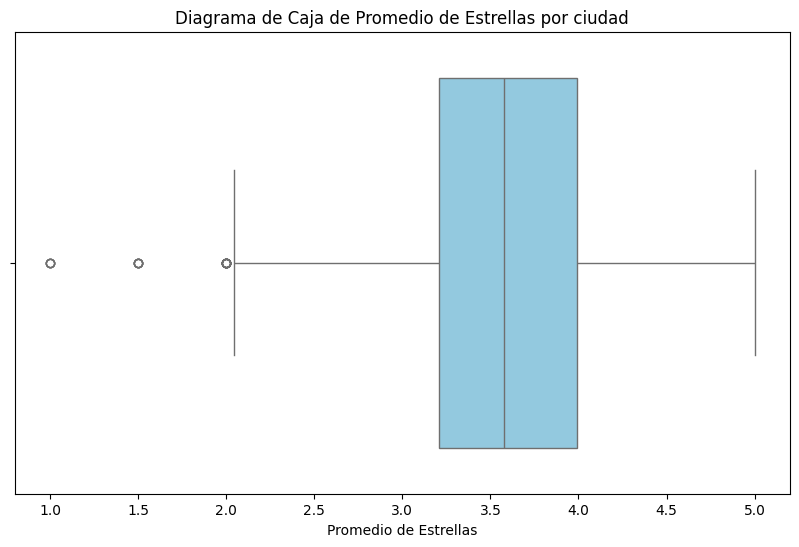

In [80]:
import seaborn as sns

# Crear un diagrama de caja para los promedios de estrellas por business_id
plt.figure(figsize=(10, 6))
sns.boxplot(x=promedio_estrellas_business_id, color='skyblue')
plt.title('Diagrama de Caja de Promedio de Estrellas por ciudad')
plt.xlabel('Promedio de Estrellas')
plt.show()



In [82]:
promedio_estrellas_city = df_merged.groupby('city')['stars_x'].mean()
promedio_estrellas_city

city
Abington         3.273810
Affton           3.166667
Alton            3.464286
Ambler           3.266667
Antioch          3.204918
                   ...   
Zionsville       3.795000
clearwater       4.500000
lutz             3.000000
santa Barbara    4.500000
telford          3.000000
Name: stars_x, Length: 551, dtype: float64